In [1]:
#import hyperpredict
import sys
sys.path.append('../')
from hyperpredict import hyper_predict, HyperPredictLightningModule

from utils import SetParams
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import wilcoxon



plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (12,8)

maximum_nfv = 160 * 192 * 224

### EXPERIMENT 1
Predicted dice/nfv vs target dice/nfv using BlandAltman plot

In [3]:
hyperpredict_bland_altman = pd.read_csv("../results/symnet_clapirn/optimal_hp_0.5%_label.csv")
hyperpredict_bland_altman = hyperpredict_bland_altman.drop(columns=['Unnamed: 0', 'label', 'target_label'])
hyperpredict_bland_altman = hyperpredict_bland_altman.groupby(['moving_index', 'fixed_index']).mean().reset_index()

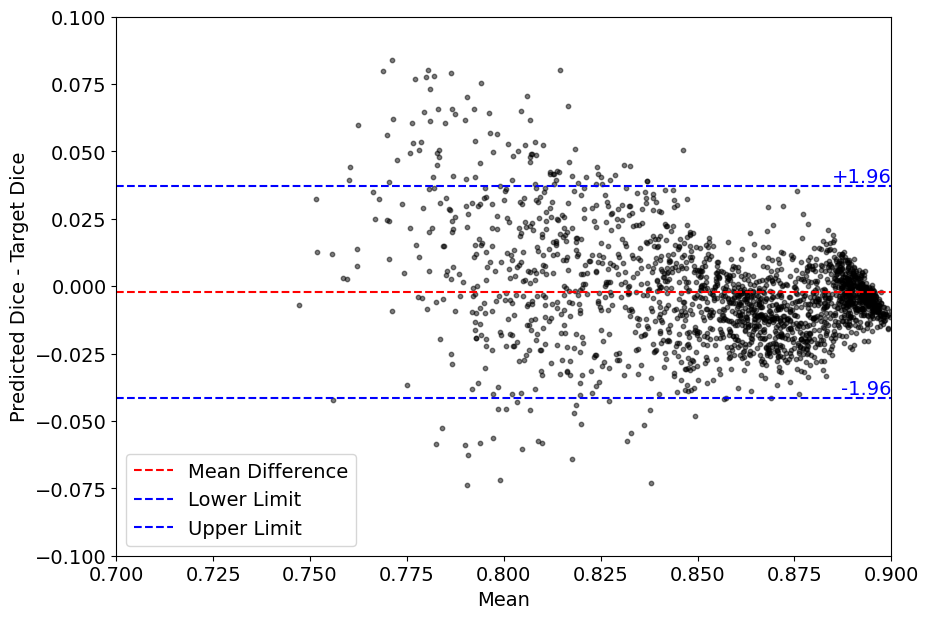

In [4]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 7))
differences = hyperpredict_bland_altman['predicted_dice'] - hyperpredict_bland_altman['target_dice']
means = (hyperpredict_bland_altman['predicted_dice'] + hyperpredict_bland_altman['target_dice']) / 2

mean_difference = np.mean(differences)
std_difference = np.std(differences)
lower_limit = mean_difference - 1.96 * std_difference
upper_limit = mean_difference + 1.96 * std_difference

plt.scatter(means, differences, color='black', s=10, alpha= 0.5)
plt.axhline(mean_difference, color='red', linestyle='--', label='Mean Difference')
plt.axhline(lower_limit, color='blue', linestyle='--', label='Lower Limit')
plt.axhline(upper_limit, color='blue', linestyle='--', label='Upper Limit')

plt.xlim(min(means) - 0.05, max(means) + 0.005)
plt.ylim(min(differences) - 0.05, max(differences) + 0.005)

plt.text(max(means), upper_limit , '+1.96', ha='right', va='bottom', color='blue')
plt.text(max(means), lower_limit, '-1.96', ha='right', va='bottom', color='blue')
plt.xlabel('Mean')
plt.ylabel('Predicted Dice - Target Dice')
plt.legend(loc = "lower left")
plt.xlim(0.7, 0.9)
plt.ylim(-0.1, 0.1)
plt.show()

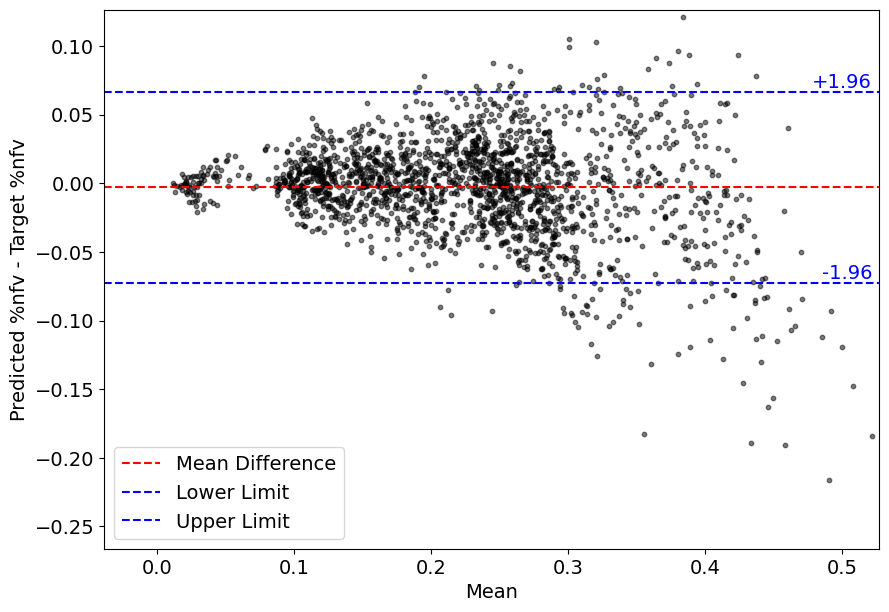

In [5]:
#Bland–Altman plot
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 7))
differences = (hyperpredict_bland_altman['predicted_nfv']/maximum_nfv * 100) - (hyperpredict_bland_altman['target_nfv']/maximum_nfv * 100)
means = ((hyperpredict_bland_altman['predicted_nfv']/maximum_nfv*100) +( hyperpredict_bland_altman['target_nfv']/maximum_nfv*100)) / 2

mean_difference = np.mean(differences)
std_difference = np.std(differences)
lower_limit = mean_difference - 1.96 * std_difference
upper_limit = mean_difference + 1.96 * std_difference

plt.scatter(means, differences, color='black', s=10, alpha= 0.5)
plt.axhline(mean_difference, color='red', linestyle='--', label='Mean Difference')
plt.axhline(lower_limit, color='blue', linestyle='--', label='Lower Limit')
plt.axhline(upper_limit, color='blue', linestyle='--', label='Upper Limit')

plt.xlim(min(means) - 0.05, max(means) + 0.005)
plt.ylim(min(differences) - 0.05, max(differences) + 0.005)

plt.text(max(means), upper_limit , '+1.96', ha='right', va='bottom', color='blue')
plt.text(max(means), lower_limit, '-1.96', ha='right', va='bottom', color='blue')
plt.xlabel('Mean')
plt.ylabel('Predicted %nfv - Target %nfv')
plt.legend(loc = "lower left")
plt.show()

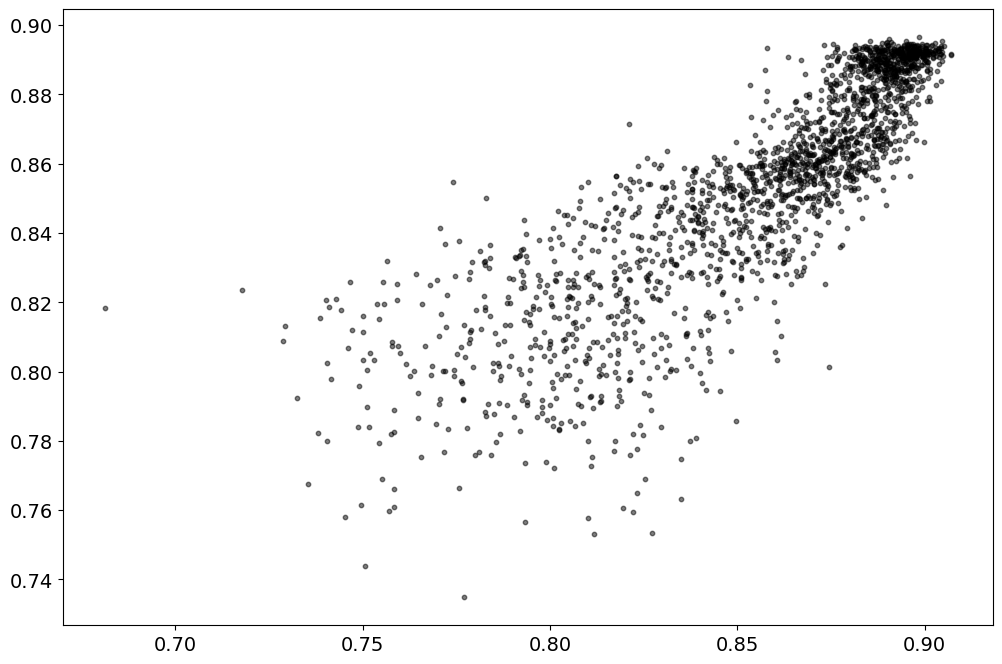

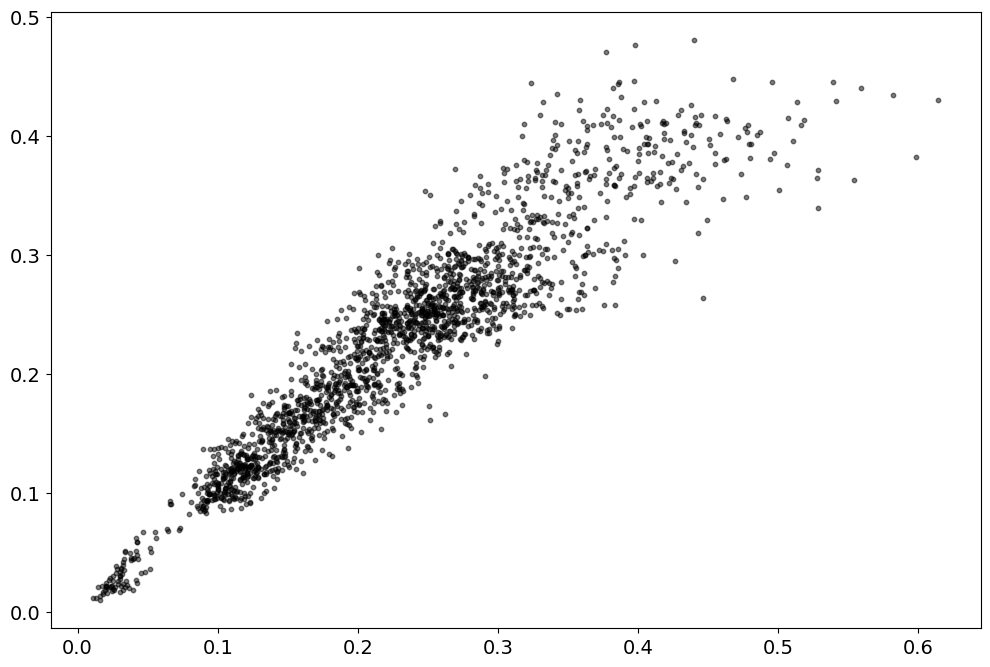

In [6]:
#plot a scatter plot between predicted and target dice and also predicted and target nfv
plt.scatter(hyperpredict_bland_altman['target_dice'], hyperpredict_bland_altman['predicted_dice'], color='black', s=10, alpha= 0.5)
plt.show()

plt.scatter(hyperpredict_bland_altman['target_nfv']/maximum_nfv*100, hyperpredict_bland_altman['predicted_nfv']/maximum_nfv*100, color='black', s=10, alpha= 0.5)
plt.show()

In [7]:
#statistical analysis
#mean difference between predicted and target dice
hyperpredict_bland_altman["dice_difference"] = abs(hyperpredict_bland_altman["predicted_dice"] - hyperpredict_bland_altman["target_dice"])
mean_difference = hyperpredict_bland_altman["dice_difference"].mean()
std = hyperpredict_bland_altman["dice_difference"].std()
print("mean and standard deviation of dice difference: ", mean_difference, std)

mean and standard deviation of dice difference:  0.014602670032654662 0.013990296148599155


In [8]:
#mean difference between predicted and target nfv
hyperpredict_bland_altman["nfv_difference"] = abs((hyperpredict_bland_altman["predicted_nfv"]/maximum_nfv *100) - (hyperpredict_bland_altman["target_nfv"]/maximum_nfv *100))
mean_difference = hyperpredict_bland_altman["nfv_difference"].mean()
std = hyperpredict_bland_altman["nfv_difference"].std()
print("mean and standard deviation of nfv difference: ", mean_difference, std)

mean and standard deviation of jac difference:  0.025409705832102534 0.024832292159861744


### MAE of difference


In [20]:
hyperpredict_bland_altman_mae = pd.read_csv("../results/symnet_clapirn/sampled_lamda_values_images.csv")
hyperpredict_bland_altman_mae["dice_difference"] = hyperpredict_bland_altman_mae["predicted_dice"] - hyperpredict_bland_altman_mae["target_dice"]
hyperpredict_bland_altman_mae = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["lamda"] >= 0.05]
hyperpredict_bland_altman_mae["nfv_difference"] = (hyperpredict_bland_altman_mae["predicted_nfv"]/ maximum_nfv)*100 - (hyperpredict_bland_altman_mae["target_nfv"]/maximum_nfv)*100



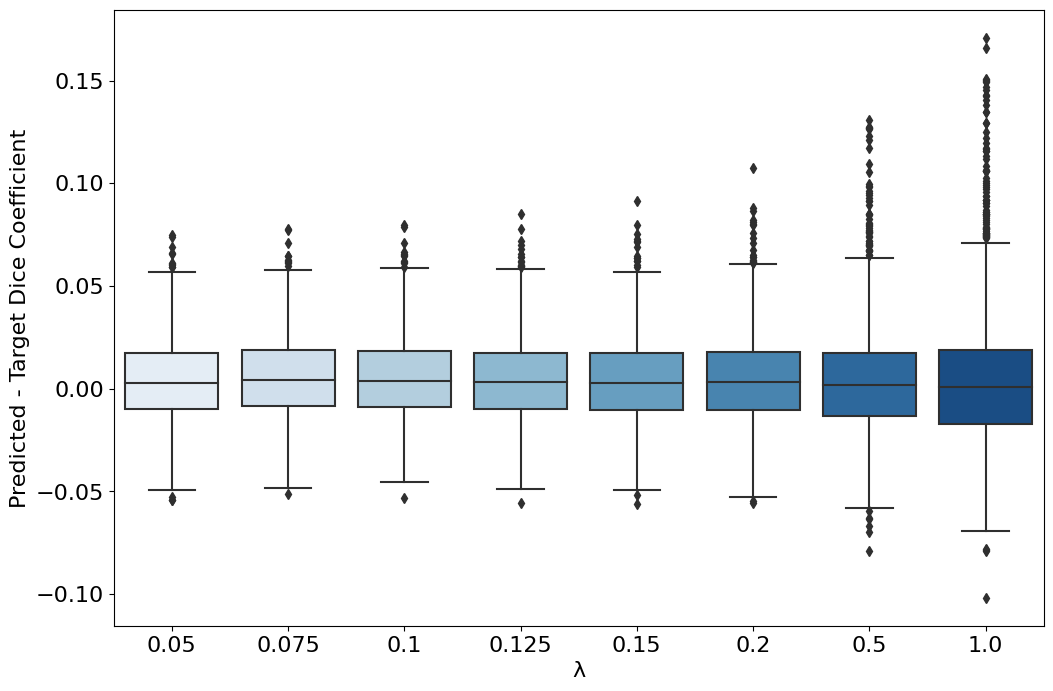

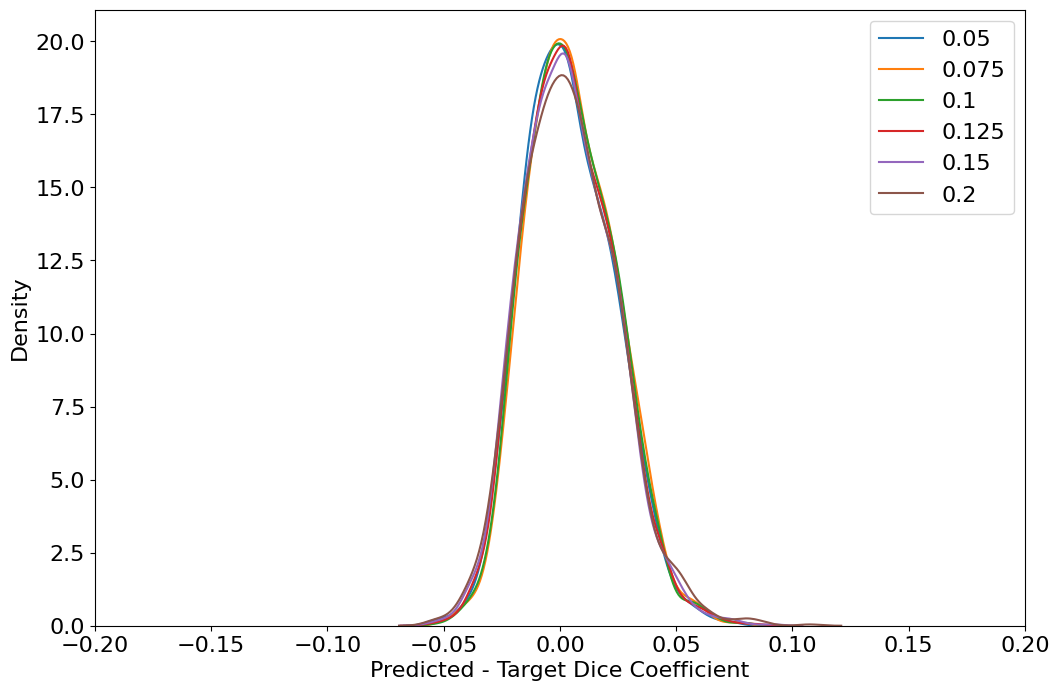

In [21]:
#dice
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (12,8)
sns.boxplot(x="lamda", y="dice_difference", data=hyperpredict_bland_altman_mae, palette="Blues")
plt.ylabel("Predicted - Target Dice Coefficient")
plt.xlabel("λ")
plt.show()


hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["lamda"] != 1]
hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["lamda"] != 0.5]
for i in hyperpredict_bland_altman_mae_sub["lamda"].unique():
    data = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["lamda"] == i]
    sns.kdeplot(data=data, x="dice_difference", label=i)
plt.xlabel("Predicted - Target Dice Coefficient")
plt.xlim(-0.2, 0.2)
plt.legend()
plt.show()


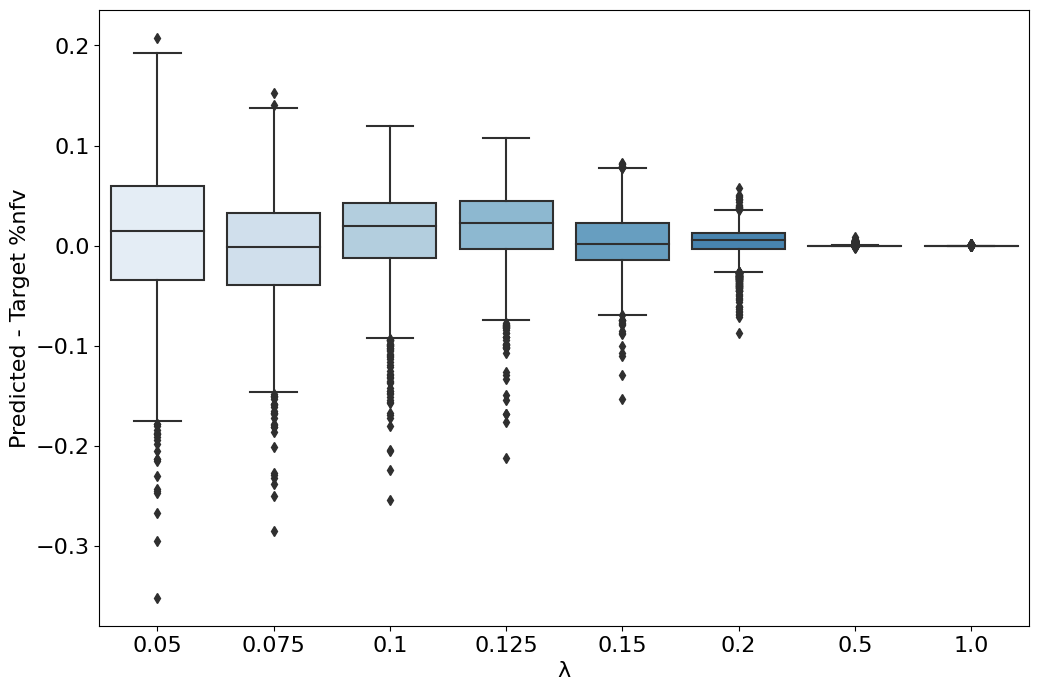

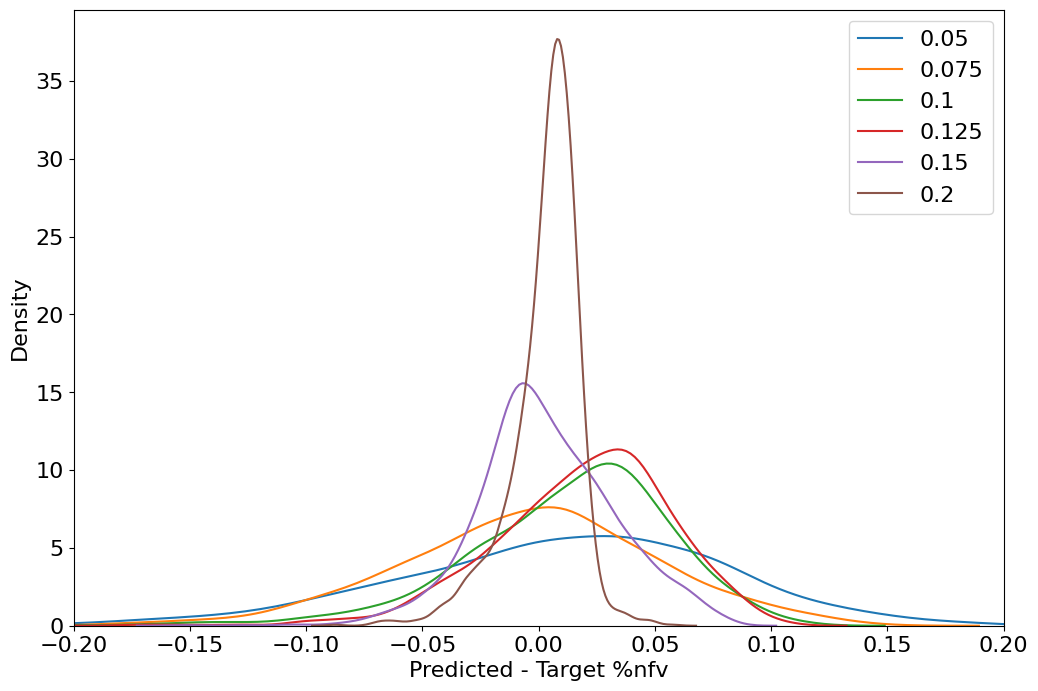

In [22]:

#nfv
sns.boxplot(x="lamda", y="nfv_difference", data=hyperpredict_bland_altman_mae, palette="Blues")
plt.ylabel("Predicted - Target %nfv")
plt.xlabel("λ")
plt.show()

#select rows where lamda is not = 1
hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["lamda"] != 1]
hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["lamda"] != 0.5]
for i in hyperpredict_bland_altman_mae_sub["lamda"].unique():
    data = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["lamda"] == i]
    sns.kdeplot(data=data, x="nfv_difference", label=i)
plt.xlabel("Predicted - Target %nfv")
plt.xlim(-0.2, 0.2)
plt.legend()
plt.show()



### Experiment 2
using optimal hp(selected for specific labels and < 0.05% of nfv>) for each pair, ran optimal samples on clpairn and compared it with CV using a single HP for entire set

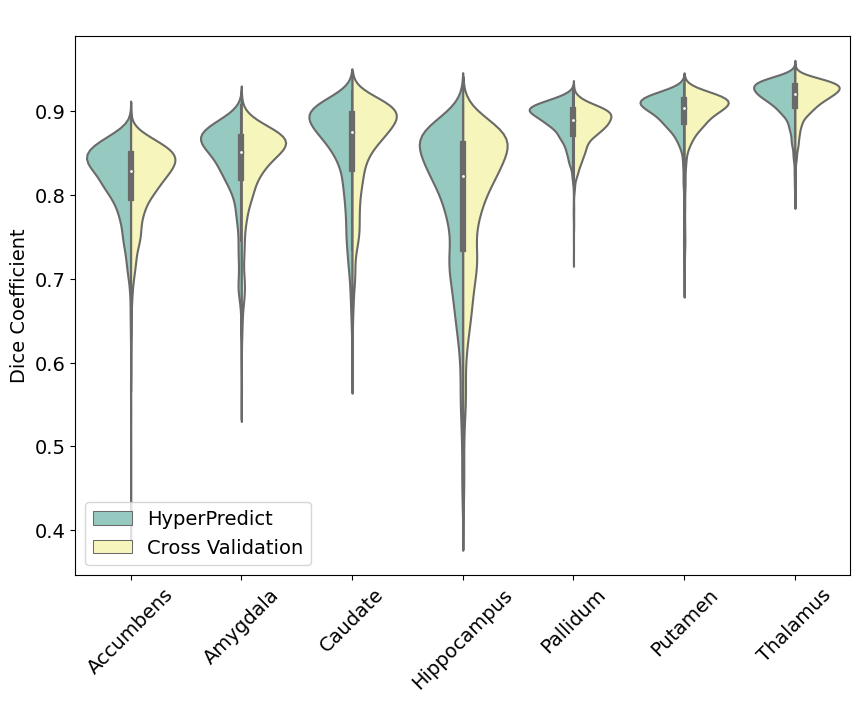

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


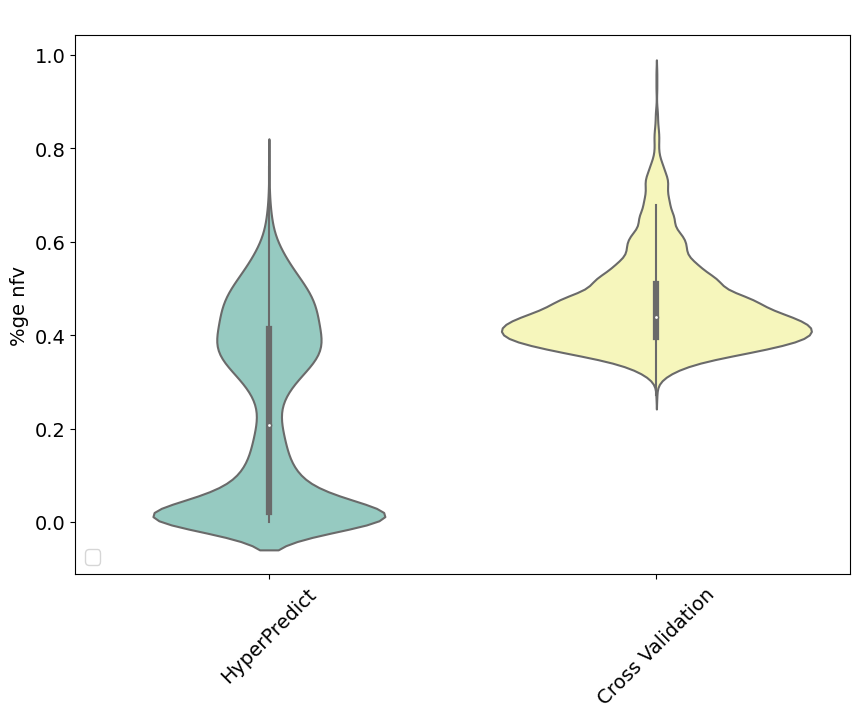

In [33]:
#plot violin plot
import pandas as pd
hyperpredict_exp2 = pd.read_csv("../results/symnet_clapirn/optimal_hp_0.5%_label.csv")

hyperpredict_exp2.rename(columns={"target_dice": "dice"}, inplace=True)
hyperpredict_exp2.rename(columns={"target_nfv": "nfv"}, inplace=True)
hyperpredict_exp2["Method"] = "HyperPredict"
selected_labels = ["Accumbens", "Amygdala", "Caudate", "Hippocampus", "Pallidum", "Putamen", "Thalamus"]
hyperpredict_exp2 = hyperpredict_exp2[hyperpredict_exp2["label"].isin(selected_labels)].reset_index(drop=True)


cross_validation_exp2 =  pd.read_csv("../results/cross_validation/clapirn/clapirn_grid_search_optimal_0.075.csv")
cross_validation_exp2 = cross_validation_exp2[cross_validation_exp2["label"].isin(selected_labels)].reset_index(drop=True)
cross_validation_exp2.rename(columns={"target_dice": "dice"}, inplace=True)
cross_validation_exp2.rename(columns={"target_nfv": "nfv"}, inplace=True)
cross_validation_exp2["Method"] = "Cross Validation"

hyperpredict_vs_crossval = pd.concat([hyperpredict_exp2, cross_validation_exp2])
hyperpredict_vs_crossval["nfv_percentage"] = (hyperpredict_vs_crossval["nfv"] / maximum_nfv) *100
hyperpredict_vs_crossval.drop(columns=["Unnamed: 0"], inplace=True)

#plot
plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 14})
sns.violinplot(x="label", y="dice", hue="Method", data=hyperpredict_vs_crossval, palette="Set3", split=True, as_cmap=True)
plt.title(" ");
plt.xlabel("");
plt.ylabel("Dice Coefficient");
plt.xticks(rotation=45)
plt.grid(False)
plt.legend(loc='lower left')
plt.show();


plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 14})


sns.violinplot(x="Method", y="nfv_percentage", data=hyperpredict_vs_crossval, palette="Set3", hue=None, split=False, as_cmap=True)

plt.title(" ");
plt.xlabel("");
plt.ylabel("%ge nfv");
plt.xticks(rotation=45)
plt.grid(False)
plt.legend(loc='lower left')
plt.show();



In [34]:
#statistical analysis
merged_df = pd.merge(hyperpredict_exp2, cross_validation_exp2, on=['moving_index', 'fixed_index', 'label'])
merged_df["dice_difference"] = abs(merged_df["dice_x"] - merged_df["dice_y"])
mean_difference = merged_df["dice_difference"].mean()
std = merged_df["dice_difference"].std()
print("mean and standard deviation of dice difference: ", mean_difference, std)

merged_df["nfv_difference"] = abs((merged_df["nfv_x"]/maximum_nfv *100) - (merged_df["nfv_y"]/maximum_nfv *100))
mean_difference = merged_df["nfv_difference"].mean()
std = merged_df["nfv_difference"].std()
print("mean and standard deviation of nfv difference: ", mean_difference, std)

# wilcoxon signed rank test
hyperpredict_exp2_wilcoxon = hyperpredict_exp2.drop(columns=['Unnamed: 0', 'target_label', 'Method'], inplace=True)
hyperpredict_exp2_wilcoxon = hyperpredict_exp2.groupby(['label']).mean().reset_index()
cross_validation_exp2_wilcoxon = cross_validation_exp2.drop(columns=['Unnamed: 0', 'Method'], inplace = True)
cross_validation_exp2_wilcoxon = cross_validation_exp2.groupby(['label']).mean().reset_index()
merged_df_wilcoxon = pd.merge(hyperpredict_exp2_wilcoxon, cross_validation_exp2_wilcoxon, on=['label'])

dice_statistics, dice_p_value  = wilcoxon(merged_df_wilcoxon["dice_x"], merged_df_wilcoxon["dice_y"])
print("dice wilcoxon: ", dice_p_value)
nfv_statistics, nfv_p_value = wilcoxon(merged_df_wilcoxon["nfv_x"]/maximum_nfv*100, merged_df_wilcoxon["nfv_y"]/maximum_nfv*100)
print("nfv wilcoxon: ", nfv_p_value)


mean and standard deviation of dice difference:  0.005300102321616499 0.007948687658541719
mean and standard deviation of nfv difference:  0.25095198046814604 0.16758956195536495
dice wilcoxon:  0.578125
nfv wilcoxon:  0.015625


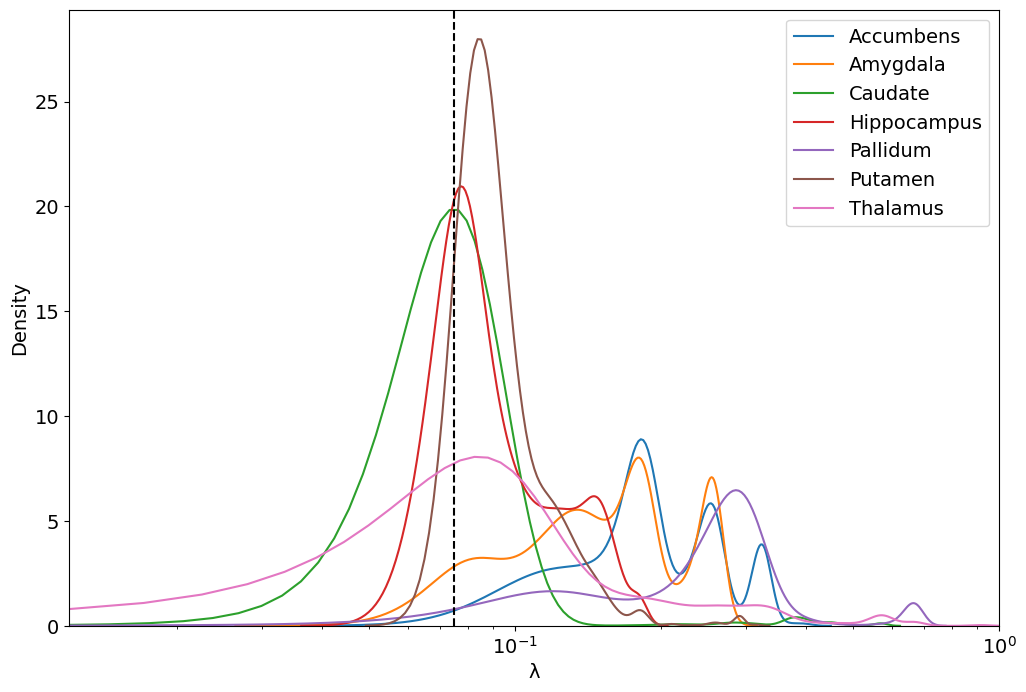

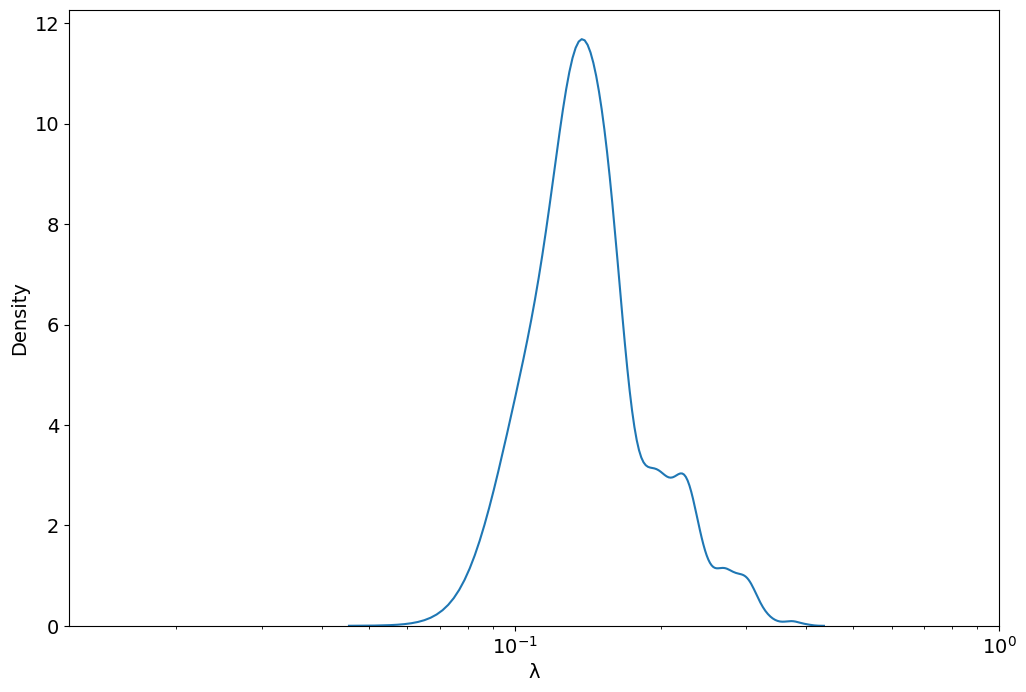

In [36]:
#distribution of optimal lamda per label 
for label in hyperpredict_exp2['label'].unique():
    subset_data = hyperpredict_exp2[hyperpredict_exp2['label'] == label]
    sns.kdeplot(data=subset_data, x='lamda', label=label)

#plot cross validation line on 0.075
plt.axvline(x=0.075, color='black', linestyle='--')
plt.xlabel('λ')
plt.ylabel('Density')
plt.legend()
plt.xscale('log')
plt.xlim(0.012, 1)

plt.show()


hyperpredict_exp2_img_dist = hyperpredict_exp2.drop(columns=["label"])
hyperpredict_exp2_img_dist = hyperpredict_exp2_img_dist.groupby(["pair_idx"]).mean().reset_index()
sns.kdeplot(data=hyperpredict_exp2_img_dist, x='lamda')
plt.xlabel('λ')
plt.xscale('log')
plt.xlim(0.012, 1)
plt.ylabel('Density')
plt.show()

### EXPERIMENT 3
Optimal Hyperparameter per image pair


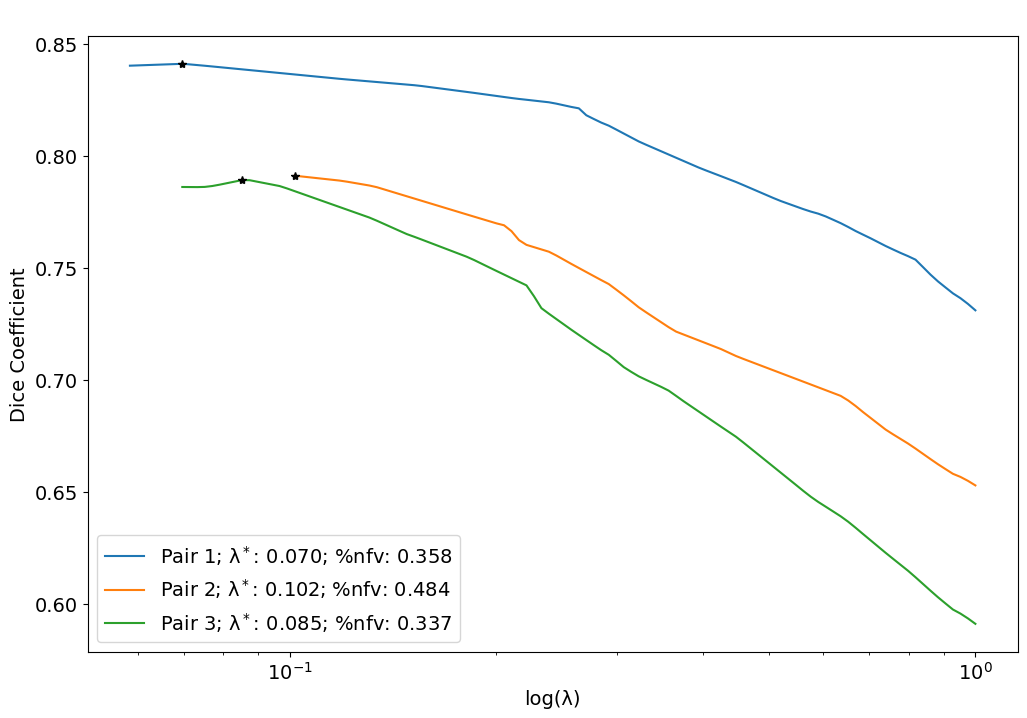

In [37]:
hyperpredict_exp3 = pd.read_csv("../results/symnet_clapirn/mean_encoding_testing_200_hps_labels.csv")

hyperpredict_exp3 = hyperpredict_exp3[hyperpredict_exp3["predicted_nfv"] < (0.005 * maximum_nfv)].reset_index(drop=True)
hyperpredict_exp3 = hyperpredict_exp3.drop(columns = ['label'])
hyperpredict_exp3 = hyperpredict_exp3.groupby(['pair_idx', 'lamda']).mean().reset_index()


indexes = [14, 99, 129]
count = 1
# for i in range(len(hyperpredict_exp3)):
for i in range(150):
    if i in indexes:

        #get the unique lamda where pair_idx is equal to i
        lamda = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["lamda"].unique()
        max_dice = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["predicted_dice"]
        lamda_max_dice = hyperpredict_exp3["lamda"].loc[max_dice.idxmax()]

        max_value = max_dice.max()
        max_index = max_dice.idxmax()
        lamda_max_value = hyperpredict_exp3.loc[max_index]["lamda"]

        moving_index = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["moving_index"].loc[max_dice.idxmax()]
        fixed_index = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["fixed_index"].loc[max_dice.idxmax()]
        predicted_voxels = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["predicted_nfv"].loc[max_dice.idxmax()]
        
        predicted_dice_value = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["predicted_dice"].values

        # sns.lineplot(x=lamda, y=predicted_dice_value, label=f"index: {i}; predicted_dice: {max_value:.3f}; λ: {lamda_max_dice}; predicted voxels: {(predicted_voxels/maximum_nfv)*100:.3f}; moving: {moving_index}; fixed: {fixed_index}")
        sns.lineplot(x=lamda, y=predicted_dice_value, alpha=1, label=f"Pair {count}; λ$^*$: {lamda_max_dice:.3f}; %nfv: {(predicted_voxels/maximum_nfv)*100:.3f}")
        if lamda_max_value > 0:
            plt.plot(lamda_max_value, max_value, '*', color='black')
        else:
            plt.plot(lamda_max_value,+1e-5, max_value, '*', color='black')

        count +=1
plt.legend(loc= "lower left");

plt.xlabel("log(λ)");
plt.ylabel("Dice Coefficient");
# plt.title("Varying Optimal λ Per Image Pair");
plt.title(" ");
plt.xscale('log')
# plt.xticks([lamda, lamda])



### EXPERIMENT 4
Optimal Hyperparameter per label

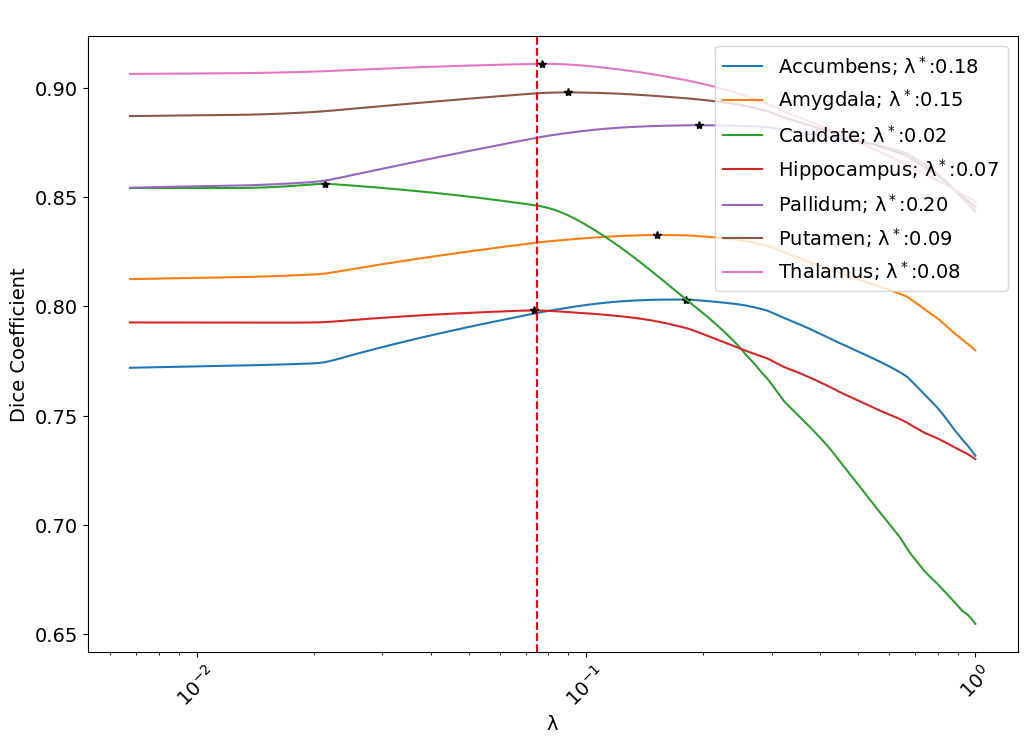

In [38]:
hyperpredict_exp4 = pd.read_csv("../results/symnet_clapirn/mean_encoding_testing_200_hps_labels.csv")

hyperpredict_exp4 = hyperpredict_exp4.groupby(['label', 'lamda']).mean().reset_index()
short_label = ['Thalamus',  'Amygdala', 'Pallidum', 'Caudate', 'Hippocampus', 'Putamen', 'Accumbens']

for idx, label in enumerate(hyperpredict_exp4["label"].unique()):
    if label in short_label:
        lamda_max_index = hyperpredict_exp4["lamda"][hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"].idxmax()]
        maximum_value = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"].max()
        lam = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["lamda"]
        sns.lineplot(x = lam, y = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"],label = f"{label}; λ$^*$:{lamda_max_index:.2f} ")
        plt.plot(lamda_max_index, maximum_value, '*', color='black')

plt.axvline(x=0.075, color='red', linestyle='--', alpha = 1.0)
plt.legend(loc="upper right")
plt.xlabel("λ")
plt.ylabel("Dice Coefficient")
plt.xticks(rotation=45)
plt.xscale('log')
plt.title(" ");

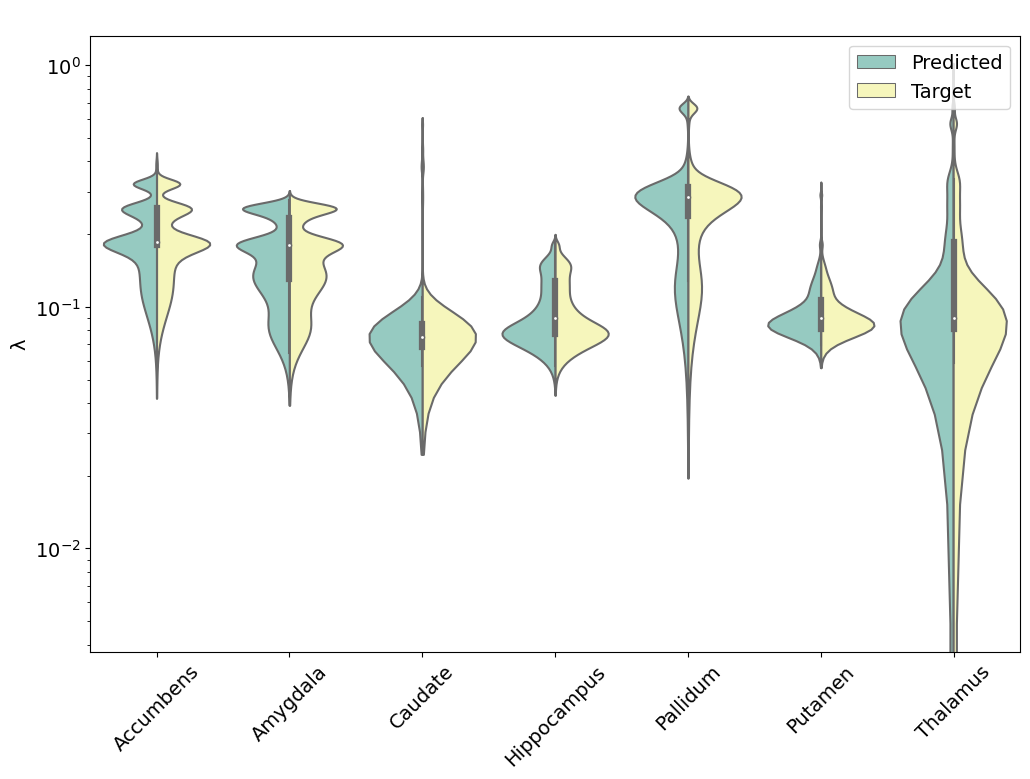

In [39]:
compare_target_predicted = pd.read_csv("../results/symnet_clapirn/optimal_hp_0.5%_label.csv")

compare_target_predicted.drop(columns=["target_label"], inplace=True)
grouped_df_target_lamda = compare_target_predicted.reset_index()
grouped_df_target_lamda = grouped_df_target_lamda.groupby(["pair_idx", "label"]).apply(lambda x: x.loc[x['target_dice'].idxmax()])["lamda"]
grouped_df_target_lamda = grouped_df_target_lamda.reset_index()
grouped_df_target_lamda["stage"] = "Target"



#Distribution of Optimal λ per Label across all Pairs - predicted dice
grouped_df_predicted_lamda = compare_target_predicted.reset_index()
grouped_df_predicted_lamda = grouped_df_predicted_lamda.groupby(["pair_idx", "label"]).apply(lambda x: x.loc[x['predicted_dice'].idxmax()])["lamda"]
grouped_df_predicted_lamda = grouped_df_predicted_lamda.reset_index()
grouped_df_predicted_lamda["stage"] = "Predicted"


#join the two dataframes
grouped_df = pd.concat([grouped_df_predicted_lamda, grouped_df_target_lamda])
sns.violinplot(x="label", y="lamda", hue="stage", data=grouped_df, palette="Set3", split=True, as_cmap=True)
plt.legend(loc='upper right')

plt.ylabel("λ")
plt.xlabel("")
plt.xticks(rotation=45)
# plt.title("Distribution of Optimal λ per Label across all Pairs")
plt.title(" ");
plt.yscale('log')
# Display the plot
plt.show()


In [220]:
#statistical analysis
#mean difference bbetween predicted and target dice
compare_target_predicted["dice_difference"] = abs(compare_target_predicted["predicted_dice"] - compare_target_predicted["target_dice"])
mean_difference = compare_target_predicted["dice_difference"].mean()
std = compare_target_predicted["dice_difference"].std()
print("mean and standard deviation of dice difference: ", mean_difference, std)


mean and standard deviation of dice difference:  0.022658652624096533 0.02773472629481095


### COMPARING ALTERNATE METHODS

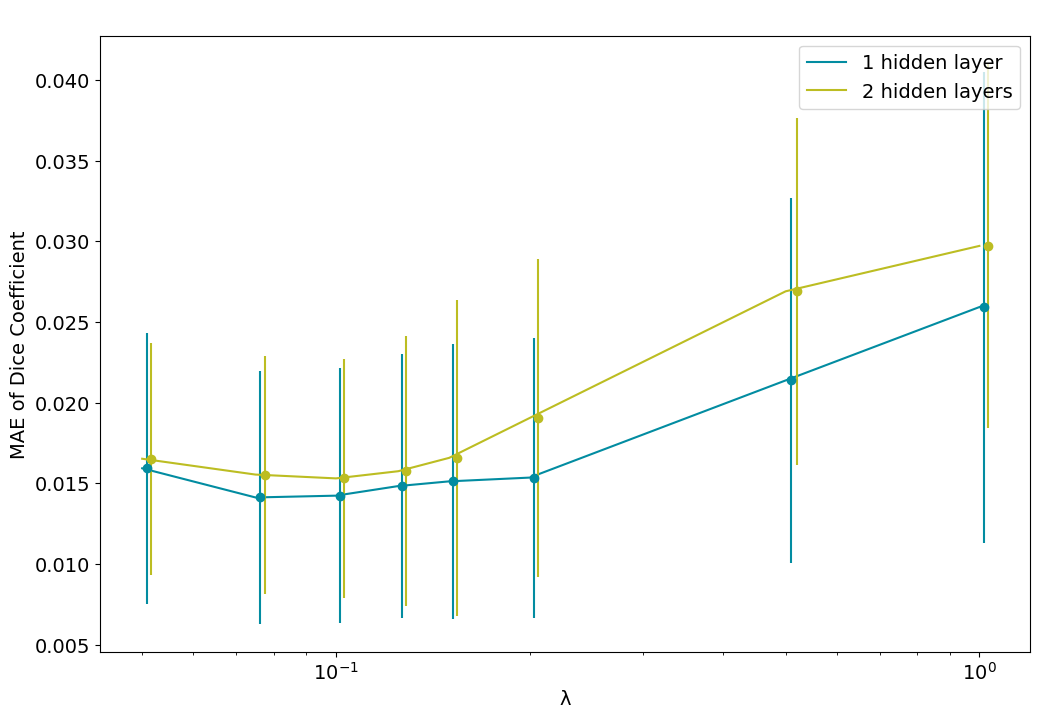

In [43]:
#using 1 hidden layer
one_hidden_layer = pd.read_csv("../results/symnet_clapirn/alternative_models/mean_encoding_1hidden_layer.csv")
two_hidden_layers = pd.read_csv("../results/symnet_clapirn/alternative_models/mean_encoding_2hidden_layer.csv")
lamda = one_hidden_layer["lamda"].unique()
lam_log = np.where(lamda > 0, np.log(lamda), np.log(lamda + 1e-5))


x_errorbar = [0.0008,0.0013 ,0.0015,0.0017,0.0020,0.003,0.01,0.015] 

#one hidden layer
one_hidden_layer["dice_difference"] = abs(one_hidden_layer["predicted_dice"] - one_hidden_layer["target_dice"])
one_hidden_layer["std_dev"] = np.std(one_hidden_layer["predicted_dice"] - one_hidden_layer["target_dice"], axis = 0)
mean_difference =  one_hidden_layer.groupby("lamda").mean().reset_index()
std_dev = one_hidden_layer.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["dice_difference"], color="#028ca1")
plt.errorbar(x_errorbar+lamda, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#028ca1')


#two hidden layers
two_hidden_layers["dice_difference"] = abs(two_hidden_layers["predicted_dice"] - two_hidden_layers["target_dice"])
mean_difference =  two_hidden_layers.groupby("lamda").mean().reset_index()
std_dev = two_hidden_layers.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["dice_difference"], color="#bcbd22")
plt.errorbar([x*2 for x in x_errorbar]+lamda, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#bcbd22')


# Create custom legend
custom_legend = [
    plt.Line2D([0], [0], color='#028ca1',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['1 hidden layer', '2 hidden layers']

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("λ");
plt.ylabel("MAE of Dice Coefficient");
plt.xscale("log")
plt.show()


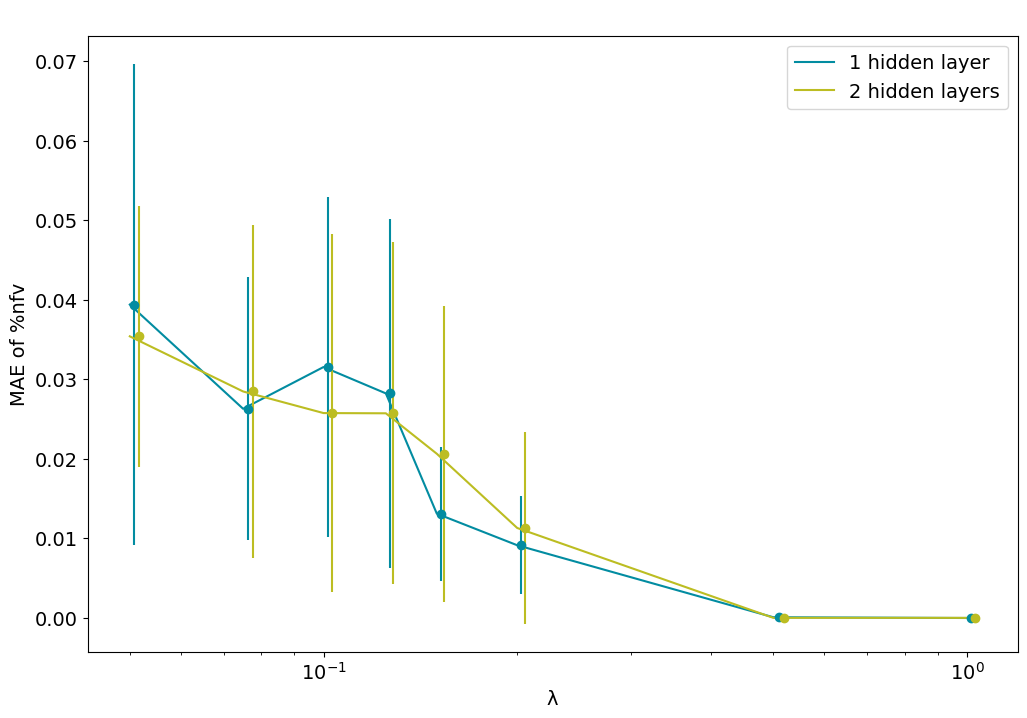

In [44]:
#nfv difference
one_hidden_layer["nfv_difference"] = abs((one_hidden_layer["predicted_nfv"]/ maximum_nfv)*100 - (one_hidden_layer["target_nfv"]/maximum_nfv)*100)
mean_difference =  one_hidden_layer.groupby("lamda").mean().reset_index()
std_dev = one_hidden_layer.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["nfv_difference"], color="#028ca1")
plt.errorbar(x_errorbar + lamda, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color = '#028ca1')

two_hidden_layers["nfv_difference"] = abs((two_hidden_layers["predicted_nfv"]/ maximum_nfv)*100 - (two_hidden_layers["target_nfv"]/maximum_nfv)*100)
mean_difference =  two_hidden_layers.groupby("lamda").mean().reset_index()
std_dev = two_hidden_layers.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["nfv_difference"], color="#bcbd22", errorbar="sd")
plt.errorbar([x*2 for x in x_errorbar]+lamda, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#bcbd22')


custom_legend = [
    plt.Line2D([0], [0], color='#028ca1', linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['1 hidden layer', '2 hidden layers',]

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("λ");
plt.ylabel("MAE of %nfv");
plt.xscale('log')
plt.show()


## APPENDIX D: Smooth Interpolation

In [ ]:
from hyperpredict import hyper_predict, HyperPredictLightningModule
from utils import SetParams
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

registration_model = "clapirn"
encoder_model = "symnet"
datapath = "data/oasis/"
pretrained_path = "models/pretrained_models/"
encoder_path = "symnet.pth"
registration_path = "clapirn.pth"
start_channel = 4
range_flow = 0.4
imgshape = (160, 192, 224)
imgshape_4 = (160 / 4, 192 / 4, 224 / 4)
imgshape_2 = (160 / 2, 192 / 2, 224 / 2)
train_batch_size =1
validation_batch_size = 1
test_batch_size = 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 1
maximum = 267054
maximum_nfv = 160 * 192 * 224

encoder = SetParams.set_encoder(encoder_model,  pretrained_path + encoder_path, start_channel, imgshape, imgshape_2, imgshape_4, range_flow)
registration = SetParams.set_registration(registration_model, start_channel, imgshape, imgshape_2, imgshape_4, range_flow, pretrained_path +registration_path) #needed for testing
training_generator, validation_generator, test_generator, testing_sub = SetParams.set_oasis_data(datapath, train_batch_size, validation_batch_size, test_batch_size, encoder_model)

print("data loaded", len(training_generator), len(validation_generator), len(test_generator), len(testing_sub))
select_in_features = {"clapirn_clapirn": 32, "clapirn_niftyreg": 80, "symnet_clapirn": 88, "symnet_niftyreg": 232}

# select_in_features = {"clapirn_clapirn": 64, "clapirn_niftyreg": 80, "symnet_clapirn": 200, "symnet_niftyreg": 232}
in_features = select_in_features[encoder_model + "_" + registration_model]
out_features = 36
mapping_features = 16 if encoder_model == "clapirn" else 32
model = HyperPredictLightningModule(hyper_predict(in_features, mapping_features, out_features),  registration_model, encoder_model, imgshape, encoder, batch_size)
model.load_state_dict(torch.load("models/checkpoints/symnet_clapirn/total_val_loss=0.00535-epoch=18-logger-mean_encoding_main_hyperpredict_network.ckpt")["state_dict"])


lam = np.linspace(-5, 0, 500)
lam = np.exp(lam)
for params in model.parameters():
    params.requires_grad = False

model.eval()
model.to(device)
columns = ["pair_idx", "moving_index", "fixed_index", "predicted_dice", "lamda", "predicted_nfv"]

dice_average_per_image_per_lamda = pd.DataFrame(columns = columns)
columns_label = ["pair_idx","moving_index", "fixed_index", "predicted_dice","lamda", "label", "predicted_nfv"]



dice_average_per_label_per_lamda = pd.DataFrame(columns = columns_label)
count  = 1
print("len of test generator", len(testing_sub))
with torch.no_grad():
    for pair_idx, data in enumerate(testing_sub):
        if pair_idx > 0:
            break
        
        pred = []
        tar = []    
        data[0:4] = [d.to(device) for d in data[0:4]]
        per_image, per_label = model.test_clapirn_200_lamdas(pair_idx, data, lam)
        
        dice_average_per_image_per_lamda = pd.concat([dice_average_per_image_per_lamda, per_image])
        print(count)
        count += 1
        

# lam_log = np.where(lam > 0, np.log(lam), np.log(lam + 1e-5))
# predicted_dice_value = dice_average_per_image_per_lamda["predicted_dice"]

# predicted_dice_value = dice_average_per_image_per_lamda["predicted_dice"]
# lamda_max_dice = dice_average_per_image_per_lamda["lamda"].iloc[predicted_dice_value.idxmax()]

# max_value = predicted_dice_value.max()
# max_index = predicted_dice_value.idxmax()
# lamda_max_value = dice_average_per_image_per_lamda.iloc[max_index]["lamda"]

# sns.lineplot(x=lam_log, y=predicted_dice_value, marker="o");
# if lamda_max_value > 0:
#     plt.plot(np.log(lamda_max_value), max_value, '*', color='black',markersize=7)
# else:
#     plt.plot(np.log(lamda_max_value+1e-5), max_value, '*', color='black', markersize=7)


# plt.xlabel("λ")
# plt.ylabel("Dice Coefficient")
# plt.title("")


        

